In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = cv2.imread('img/people2.jpg');

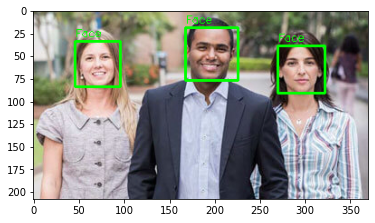

In [3]:
# Given the image above, lets detect faces on the image using haar cascades
# First create a CascadeClassifier using the frontalFace classifier -> Haarcascades/haarcascade_frontalface_default.xml
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Convert the image to grayscale
img = image.copy()
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Using the classifiers detect all faces on the image
face_detect = face_classifier.detectMultiScale(gray_img, minNeighbors = 20)

# If no faces detected print("No faces found")


# Otherwise draw a rectangle on each face that has been detected
if face_detect is None:
    print('No Faces found')
else:
    for x,y,w,h in face_detect:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        cv2.putText(img, 'Face', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 1)
        
plt.imshow(img[:,:,::-1]); #switch the color channels and show it in RGB

In [4]:
# Repeat the process above with your own images
concert = cv2.imread('img/concert.jpg');

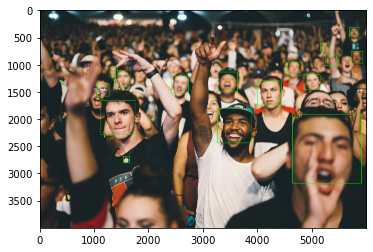

In [5]:
# Convert the image to grayscale
img = concert.copy()
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Using the classifiers detect all faces on the image
face_detect = face_classifier.detectMultiScale(gray_img, minNeighbors = 20)

# If no faces detected print("No faces found")


# Otherwise draw a rectangle on each face that has been detected
if face_detect is None:
    print('No Faces found')
else:
    for x,y,w,h in face_detect:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 5)
        cv2.putText(img, 'Face', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 1)
        
plt.imshow(img[:,:,::-1]); #switch the color channels and show it in RGB

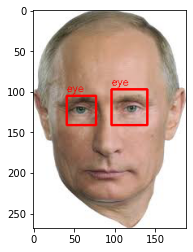

In [6]:
# Now do the same but this time also detect eyes in the faces using -> Haarcascades/haarcascade_eye.xml
def eye_detector(image):
    
    image = cv2.imread(image)
    img = image.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

    eye_detect = eye_classifier.detectMultiScale(gray_img, minNeighbors = 20)
    
    if eye_detect is None:
        print('No Faces found')
    else:
        for x,y,w,h in eye_detect:
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
            cv2.putText(img, 'eye', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255), 1)
    
    plt.imshow(img[:,:,::-1]); #switch the color channels and show it
    
eye_detector('img/putin.jpg')

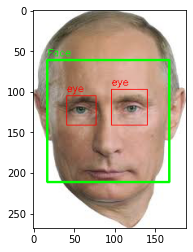

In [7]:
# Now do the same but this time also detect eyes in the faces using -> Haarcascades/haarcascade_eye.xml
#doing face and eyes rather than only eyes

def face_eye_detector(image):
    
    image = cv2.imread(image)
    img = image.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
    eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')
    
    face_detect = face_classifier.detectMultiScale(gray_img, minNeighbors = 20)
    eye_detect = eye_classifier.detectMultiScale(gray_img, minNeighbors = 20)
    
    if face_detect is None:
        print('No Faces found')
    else:
        for x,y,w,h in face_detect:
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            cv2.putText(img, 'Face', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 1)
            
            for x,y,w,h in eye_detect:
                cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 1)
                cv2.putText(img, 'eye', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255), 1)
    
    plt.imshow(img[:,:,::-1]); #switch the color channels and show it
    
face_eye_detector('img/putin.jpg')



In [8]:
# Encapsulate all the logic to detect faces and eyes in a function and apply it to live video using you webcam

def live_detector():
    
    cap = cv2.VideoCapture(0) 
    
    #Intial checkup for camera
    if not cap.isOpened():
        print("Cannot open camera")
        exit()
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break
            
        # Our operations on the frame come here
        gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
        face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
        eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')
    
        face_detect = face_classifier.detectMultiScale(gray_img, minNeighbors = 20)
        #print(len(face_detect))
        eye_detect = eye_classifier.detectMultiScale(gray_img, minNeighbors = 20)
        #print(len(eye_detect))
    
        if face_detect is None: # we can also use, if len(face_detect) == 0
            cv2.putText(frame, "No faces detected: ", (0, frame.shape[0]-450), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (0,0,0), 1)
            #print('No Faces found')
        else:
            #draw a bounding box for each detected face and implment a counter
            for x,y,w,h in face_detect:
                cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
                
                #implement face counter for each detected face
                for each_face in range(len(face_detect)):
                    cv2.putText(frame, 'Face'+str(each_face), (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 1)
                    
                cv2.putText(frame, "Number of faces detected: " + str(face_detect.shape[0]), (0, frame.shape[0]-450), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (255,0,0), 1) 
                
                #draw a bounding box for each detected eye
                for x,y,w,h in eye_detect:
                    cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255), 1)
                    cv2.putText(frame, 'eye', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255), 1)
    
        # Display the resulting frame
        cv2.imshow('Face_eye_detector', frame)
        if cv2.waitKey(1) == ord('q'):
            break
    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()
    
live_detector()